In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("dataset.csv")

In [10]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,27.0,28.0,06,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,41.888430,-87.667064,"(41.888429628, -87.667063831)"
1,2110300,2687361,HJ308830,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,25.0,31.0,08B,1165650.0,1891466.0,2003,02/10/2018 03:50:01 PM,41.857773,-87.667445,"(41.857773091, -87.667444544)"
2,381828,10755691,HZ518320,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144531.0,1895566.0,2016,02/10/2018 03:50:01 PM,41.869447,-87.744861,"(41.869447309, -87.744861466)"
3,6048052,8740111,HV415603,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,5.0,69.0,08B,1183801.0,1857416.0,2012,02/04/2016 06:33:39 AM,41.763932,-87.601884,"(41.763931739, -87.601884055)"
4,6873402,11924187,JC549979,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,40.0,77.0,14,1163394.0,1941667.0,2019,12/23/2019 03:56:38 PM,41.995575,-87.674309,"(41.995575459, -87.674309158)"


In [11]:
#Counting NaN values in the dataset for each column
df.isnull().sum()

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [11]:
#There are zero missing values in the dataset, so we are good to go.
#Next we remove the columns that are not useful to our problem, namely "Unnamed:0", "ID", 
#"Case number", "Dsecription", "Updated on", "Location (as Latitude and Longitude present separately already)"

df.drop(df.columns[[0, 1, 2, 7, 19, 22]], axis=1, inplace=True)

In [19]:
df.head()
#We now have 17 variables left with us, out of which we shall perform feature selection

,Date,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
0,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,STREET,False,False,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,2002,41.888430,-87.667064
1,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,SIDEWALK,False,True,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,2003,41.857773,-87.667445
2,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,STREET,True,False,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,2016,41.869447,-87.744861
3,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,OTHER,False,False,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,2012,41.763932,-87.601884
4,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,APARTMENT,False,False,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,2019,41.995575,-87.674309


In [1]:
#My next task is to find correlation among the variables, in order to select most relevant ones.
#One option is to use one-hot encoding, but due to the number of categories in each column, we will end up with too many variables
#Another option for categorical variables is Cramer's V, but to reduce the loss of information due to its symmetry, we shall
#consider its asyymetric version ie. Thiel's U Cofficient. Here Corr(X,Y) != Corr(Y,X)

#Thiels U can be used to obtain correlation between any 2 categorical variables


In [12]:
from dython.nominal import theils_u

In [76]:
#The categorical variables in our dataset are 
#"Block", "IUCR", "Primary Type", "Location Description", "Arrest", "Domestic", "Beat", "District", "Ward", "Community Area", "FBI Code", "Year"
    

In [84]:
da = df.loc[:, ["Block", "IUCR", "Primary Type", "Location Description", "Arrest", "Domestic", "Beat", "District", "Ward", "Community Area", "FBI Code", "Year"]]

In [105]:
names = []
coff = []

In [107]:
for column in da:
    names.append(column)
    coff.append(theils_u(da["Primary Type"], da[column]))

In [101]:
corr_data = {"Name": names, "correlation": coff}

In [102]:
corr_df = pd.DataFrame(corr_data)
corr_df

,Name,correlation
0,Block,0.473695
1,IUCR,0.999491
2,Primary Type,1.000000
3,Location Description,0.145291
4,Arrest,0.090326
5,Domestic,0.049016
6,Beat,0.054726
7,District,0.024918
8,Ward,0.030391
9,Community Area,0.034029


In [103]:
#Now to find the correlation between Primary Type and continuous numeric variables namely, X,Y co-ordinates and the Latitude and Longitude
#I shall use the Correlation Ratio measure for this. It gives a measure of correlation for one categorical and another numeric variable

from dython.nominal import correlation_ratio


In [108]:
db = df.loc[:, ["X Coordinate", "Y Coordinate", "Latitude", "Longitude"]]
for column in db:
    names.append(column)
    coff.append(correlation_ratio(da["Primary Type"], db[column]))

corr_data = {"Name": names, "correlation": coff}
corr_df = pd.DataFrame(corr_data)
corr_df

,Name,correlation
0,Block,0.473695
1,IUCR,0.999491
2,Primary Type,1.000000
3,Location Description,0.145291
4,Arrest,0.090326
5,Domestic,0.049016
6,Beat,0.054726
7,District,0.024918
8,Ward,0.030391
9,Community Area,0.034029


In [111]:
corr_df.sort_values(by=["correlation"], ascending=False, ignore_index=True)

,Name,correlation
0,Primary Type,1.000000
1,IUCR,0.999491
2,FBI Code,0.948322
3,Block,0.473695
4,Location Description,0.145291
5,Y Coordinate,0.133210
6,Latitude,0.132909
7,Arrest,0.090326
8,Longitude,0.084773
9,X Coordinate,0.083961


In [13]:
#To analyze the correlation with Date and time, we shall break the Date column into 4 different variables namely:
#Day of month, month, hour, minute using datetime features of Pandas

df["Date"] = pd.to_datetime(df["Date"])

In [14]:
df["Month"] = df["Date"].dt.month
df["Day of month"] = df["Date"].dt.day
df["Hour"] = df["Date"].dt.hour
df["Minute"] = df["Date"].dt.minute
df["Day of week"] = df["Date"].dt.dayofweek

In [15]:
#We can now delete the date variable
df.drop(df.columns[[0]], axis=1, inplace=True)
df.head()

,Block,IUCR,Primary Type,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,...,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day of month,Hour,Minute,Day of week
0,003XX N ASHLAND AVE,0810,THEFT,STREET,False,False,1333,12.0,27.0,28.0,...,1165667.0,1902638.0,2002,41.888430,-87.667064,11,15,12,30,4
1,016XX W 18TH ST,0486,BATTERY,SIDEWALK,False,True,1222,12.0,25.0,31.0,...,1165650.0,1891466.0,2003,41.857773,-87.667445,4,18,18,10,4
2,009XX S CICERO AVE,1506,PROSTITUTION,STREET,True,False,1131,11.0,24.0,25.0,...,1144531.0,1895566.0,2016,41.869447,-87.744861,11,16,21,50,2
3,072XX S INGLESIDE AVE,0460,BATTERY,OTHER,False,False,324,3.0,5.0,69.0,...,1183801.0,1857416.0,2012,41.763932,-87.601884,8,4,17,15,5
4,017XX W THOME AVE,1310,CRIMINAL DAMAGE,APARTMENT,False,False,2433,24.0,40.0,77.0,...,1163394.0,1941667.0,2019,41.995575,-87.674309,12,16,16,45,0


In [16]:
#Creating Correlation matrix, using thiels for cat-cat, corr ratio for cat-numeric, and pearson corr for numeric-numeric
#reording columns to keep categorical variables together and numerical variables together

new_order = [2,1,10,0,3,4,5,6,7,8,9,17,16,13,18,19,20,11,12,14,15]
df = df[df.columns[new_order]]  

In [123]:
df.head()

,Primary Type,IUCR,FBI Code,Block,Location Description,Arrest,Domestic,Beat,District,Ward,...,Day of month,Month,Year,Hour,Minute,Day of week,X Coordinate,Y Coordinate,Latitude,Longitude
0,THEFT,0810,06,003XX N ASHLAND AVE,STREET,False,False,1333,12.0,27.0,...,15,11,2002,12,30,4,1165667.0,1902638.0,41.888430,-87.667064
1,BATTERY,0486,08B,016XX W 18TH ST,SIDEWALK,False,True,1222,12.0,25.0,...,18,4,2003,18,10,4,1165650.0,1891466.0,41.857773,-87.667445
2,PROSTITUTION,1506,16,009XX S CICERO AVE,STREET,True,False,1131,11.0,24.0,...,16,11,2016,21,50,2,1144531.0,1895566.0,41.869447,-87.744861
3,BATTERY,0460,08B,072XX S INGLESIDE AVE,OTHER,False,False,324,3.0,5.0,...,4,8,2012,17,15,5,1183801.0,1857416.0,41.763932,-87.601884
4,CRIMINAL DAMAGE,1310,14,017XX W THOME AVE,APARTMENT,False,False,2433,24.0,40.0,...,16,12,2019,16,45,0,1163394.0,1941667.0,41.995575,-87.674309


In [124]:
corr_mat = np.zeros((21,21))

In [128]:
cols = np.array(df.columns)

In [132]:
for i in range(17):
    for j in range(17):
        corr_mat[i][j] = theils_u(df[cols[j]], df[cols[i]])

In [134]:
for i in [17,18,19,20]:
    for j in range(17):
        corr_mat[i][j] = correlation_ratio(df[cols[j]], df[cols[i]])
        corr_mat[j][i] = correlation_ratio(df[cols[j]], df[cols[i]])

In [148]:
for i in [17,18,19,20]:
    for j in [17,18,19,20]:
        corr_mat[i][j] = np.corrcoef(df[cols[i]], df[cols[j]])[0][1]

In [149]:
corr_df = pd.DataFrame(data = corr_mat, 
                  index = cols, 
                  columns = cols)

In [151]:
import seaborn as sb

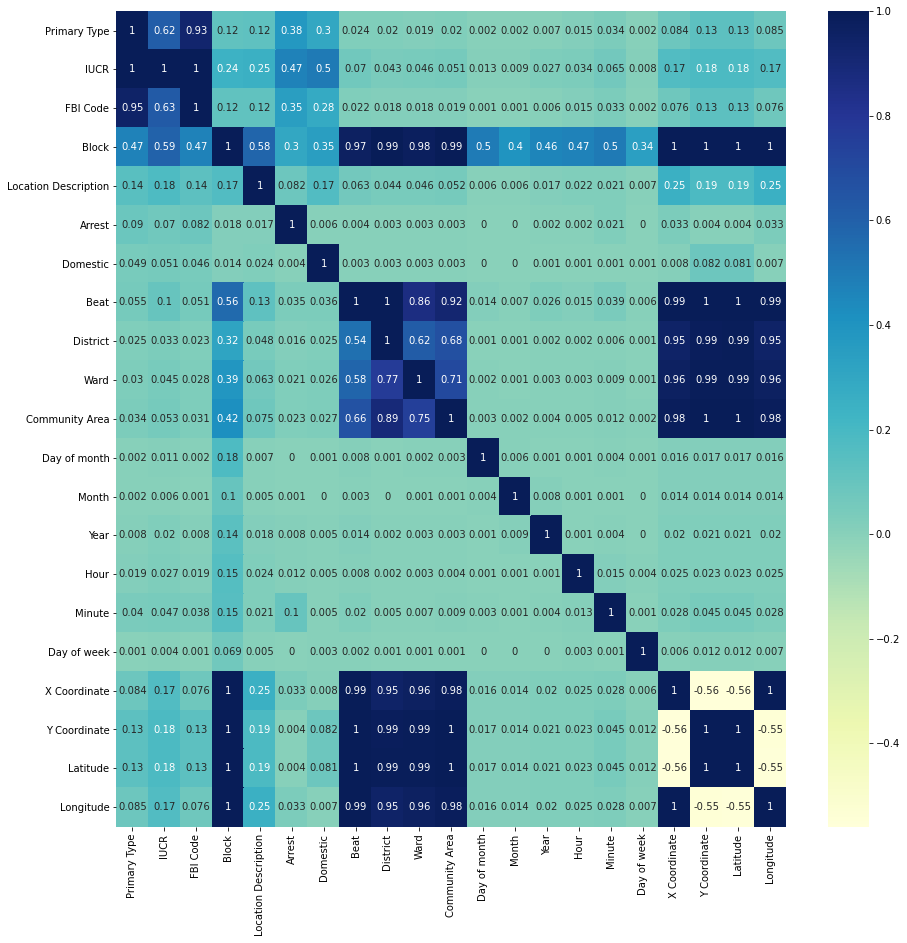

In [162]:
fig, ax = plt.subplots(figsize=(15,15))         
sb.heatmap(corr_df.round(decimals=3), cmap="YlGnBu", annot=True, ax=ax)
plt.show()

In [163]:
#Some inferences from the above the matrix:
#We can notice the asymmetric nature of the heatmap, arising due to the use of Thiels U Coefficient
#"Primary Type","IUCR" and "FBI Code" are all highly correlated with each other as they are 3 ways of classifying crime into different types
#Since knowing IUCR gives full correlation ie.1 with Primary Type and FBI Code, whereas knowing FBI code or Primary type gives only partial correlation with IUCR
#We shall choose IUCR code to designate crime type and remove the other 2 for dimensionality reduction

#Corr(X-coordinate, Longitude) = 1 and Corr(Y-coordinate,Latitude) =1, and they have similar correlation values with other variables too
#Hence, enough to consider one single pair for location. We shall take Latitude and Longitude as they are more interpretable

#Correlation of Latitude with Beat,District,Ward and Community area is almost 1. Also, Latitude and Longitude tell us 
#much more about the IUCR value in comparison to the other 4 variables. Hence we shall not consider them thus reducing our dimensionality of the dataset.

#The Block variable seems to explain much about lot of variables and hence is useful in our dataset.

#Day of the week has extremely low correlation with all the variables, and hence shall be removed as it is not useful in explaining our data

In [17]:
#So finally, our dataset after removing the redundant variables, contains 12 variables and looks as follows :
df.drop(df.columns[[0,2,7,8,9,10,16,17,18]], axis=1, inplace=True)

df.head()

,IUCR,Block,Location Description,Arrest,Domestic,Day of month,Month,Year,Hour,Minute,Latitude,Longitude
0,0810,003XX N ASHLAND AVE,STREET,False,False,15,11,2002,12,30,41.888430,-87.667064
1,0486,016XX W 18TH ST,SIDEWALK,False,True,18,4,2003,18,10,41.857773,-87.667445
2,1506,009XX S CICERO AVE,STREET,True,False,16,11,2016,21,50,41.869447,-87.744861
3,0460,072XX S INGLESIDE AVE,OTHER,False,False,4,8,2012,17,15,41.763932,-87.601884
4,1310,017XX W THOME AVE,APARTMENT,False,False,16,12,2019,16,45,41.995575,-87.674309


In [18]:
df.shape

(100000, 12)

In [167]:
#Now, we shall proceed with performing unsupervised learning algorithms for clustering our data

In [166]:

#Euclidean distance is not a good measure for distance between feature vectors that have lot of categorical variables

#Hence, based on existing literature, we shall use the "Gower distance metric" which is very useful in finding distances
#between datapoints containing a mixture of categorical and numeric variables. Its theory is explained in the report

#The clustering algorithm that is suitable with the Gower distance is the K-Medoids method ie. PAM (Partition around Medoids)


In [ ]:
#We shall perform repeated random sampling of the dataset in order to estimate the best K-value based on its performance
#Performance metrics such as NMI, F-mesure cannot be used since we are not given the ground truths of cluster labels
#Silhouette score shall be used since it measures clustering performance without use of ground truths. Its theory is explained in the report
#We shall try for K value = 2, 3, 4, 5, 6 on each random sample of size 10,000 and repeat this process 4 times

In [19]:
#First I shall calculate the Distance matrix consisting of distance of each datapoint from all other datapoints
import gower

In [395]:
random_df1 = df.sample(10000)

In [396]:
dist_matrix1 = gower.gower_matrix(random_df1)

In [398]:
dist_matrix1

array([[0.        , 0.3291007 , 0.41902608, ..., 0.47142407, 0.46682346,
        0.42833528],
       [0.3291007 , 0.        , 0.5318891 , ..., 0.42563212, 0.41043264,
        0.38963714],
       [0.41902608, 0.5318891 , 0.        , ..., 0.48406097, 0.446283  ,
        0.434251  ],
       ...,
       [0.47142407, 0.42563212, 0.48406097, ..., 0.        , 0.3288101 ,
        0.2803769 ],
       [0.46682346, 0.41043264, 0.446283  , ..., 0.3288101 , 0.        ,
        0.4286396 ],
       [0.42833528, 0.38963714, 0.434251  , ..., 0.2803769 , 0.4286396 ,
        0.        ]], dtype=float32)

In [20]:
from sklearn_extra.cluster import KMedoids
import sklearn

In [400]:
sil_scores = [0]*5
for i in [2,3,4,5,6]:
    km_model = KMedoids(n_clusters = i, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(dist_matrix1)
    sil_scores[i-2] = sklearn.metrics.silhouette_score(X= dist_matrix1, labels = km_model.labels_, metric = "precomputed")
    
sil_scores

[0.12571906,
 0.080280125,
 0.08836441,
 0.0869821,
 0.06962402,
 0.060029894,
 0.061275892,
 0.057818346,
 0.05904853]

In [258]:
#Clearly, we can observe that the maximum occurs between 2 to4 4 itself, I shall repeat this process 4 more times in order to have more conclusive evidence

In [21]:
sil_mat = np.zeros((4, 5))

In [22]:
for i in range(4):
    random_df = df.sample(10000)
    dist_matrix = gower.gower_matrix(random_df)
    for j in range(5):
        km_model = KMedoids(n_clusters = j+2, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(dist_matrix)
        sil_mat[i][j] = sklearn.metrics.silhouette_score(X= dist_matrix, labels = km_model.labels_, metric = "precomputed")
        
sil_mat.round(decimals=4)

array([[0.0528, 0.0755, 0.0727, 0.0695, 0.0626],
       [0.1388, 0.139 , 0.0832, 0.0729, 0.0709],
       [0.0506, 0.0825, 0.0852, 0.0721, 0.0598],
       [0.153 , 0.0982, 0.0957, 0.0895, 0.0807]])

Text(0, 0.5, 'Silhouette score')

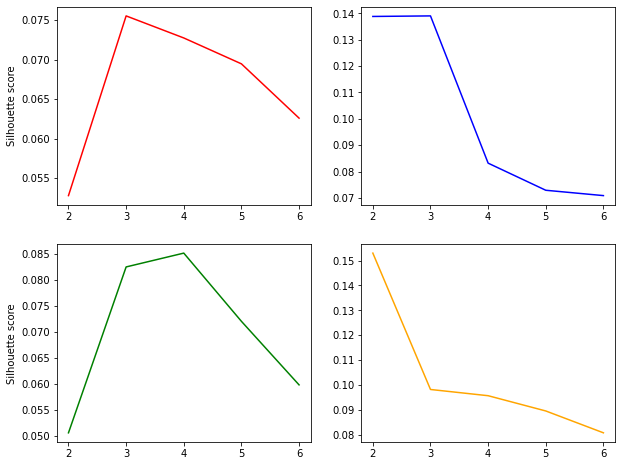

In [23]:
figure, axis = plt.subplots(2, 2, figsize=(10,8))

axis[0,0].plot(np.array([2,3,4,5,6]), sil_mat[0], color ="red")
axis[0,1].plot(np.array([2,3,4,5,6]), sil_mat[1], color ="blue")
axis[1,0].plot(np.array([2,3,4,5,6]), sil_mat[2], color ="green")
axis[1,1].plot(np.array([2,3,4,5,6]), sil_mat[3], color ="orange")

axis[0,0].set_ylabel("Silhouette score")
axis[1,0].set_ylabel("Silhouette score")



In [ ]:
#We see an interesting pattern wherein in 2 instances there is a clear peak for k=4 and for 3 others the graphs peak at k=2 itself
#This may be occuring due to the random selection the datapoints. Hence, all we can ascertain from this is, the best k-value 
#occurs between 2-4 for our given dataset.

#Before concluding
#Let us now examine how does our variables affect the cluster labels in the data. We shall prepare a scatterplot showing
# Location for each point and the cluster labels to see how much does the Latitude and Longitude contribute the the cluster structure

#I shall compare the plots for both k=2 and 4

In [295]:
random_df = df.sample(10000)
dist_matrix = gower.gower_matrix(random_df)
km_model2 = KMedoids(n_clusters = 2, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(dist_matrix)
km_model4 = KMedoids(n_clusters = 4, random_state = 0, metric = 'precomputed', method = 'pam', init =  'k-medoids++').fit(dist_matrix)


In [296]:
random_df["labels_k2"] = km_model2.labels_
random_df["labels_k4"] = km_model4.labels_

In [298]:
random_df.head()

,IUCR,Block,Location Description,Arrest,Domestic,Day of month,Month,Year,Hour,Minute,Latitude,Longitude,labels_k2,labels_k4
90347,0281,010XX W 70TH ST,APARTMENT,False,False,17,2,2007,2,45,41.766924,-87.651043,1,3
55444,0820,007XX W BITTERSWEET PL,PARKING LOT/GARAGE(NON.RESID.),False,False,22,6,2004,22,0,41.955683,-87.648044,1,1
36455,0610,039XX S ARCHER AVE,SMALL RETAIL STORE,False,False,11,1,2005,19,0,41.821174,-87.692698,0,0
64538,1811,069XX S BISHOP ST,ALLEY,True,False,26,2,2003,13,40,41.768057,-87.660265,1,2
10015,0486,013XX N ROCKWELL ST,STREET,False,True,30,5,2004,16,10,41.905954,-87.692027,1,3


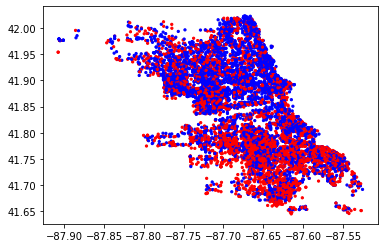

In [306]:
colormap = np.array(['r', 'b'])
plt.scatter(np.array(random_df["Longitude"]), np.array(random_df["Latitude"]), s=5, c=colormap[km_model2.labels_])
plt.show()

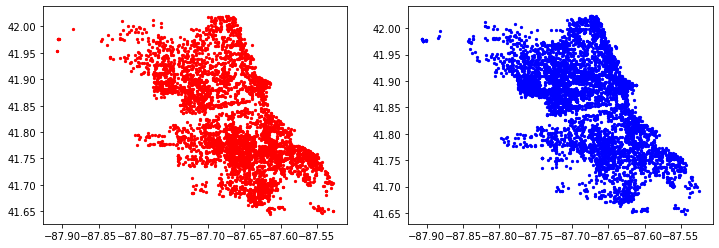

In [392]:
figure, axis = plt.subplots(1, 2, figsize=(12,4))
random_df = random_df.reset_index(drop=True)

clus_0 = []
clus_1 = []

for i in range(10000):
    clus_0.append(random_df["labels_k2"][i] == 0)
    clus_1.append(random_df["labels_k2"][i] == 1)

axis[0].scatter(np.array(random_df.loc[clus_0, "Longitude"]), np.array(random_df.loc[clus_0, "Latitude"]), s=5, c="r")
axis[1].scatter(np.array(random_df.loc[clus_1, "Longitude"]), np.array(random_df.loc[clus_1, "Latitude"]), s=5, c= "b")
plt.show()

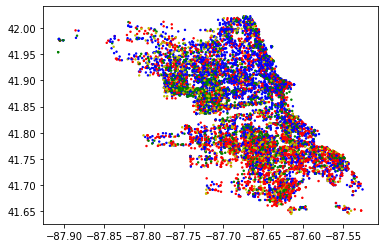

In [311]:
colormap = np.array(['r', 'b', 'g', 'y'])
plt.scatter(np.array(random_df["Longitude"]), np.array(random_df["Latitude"]), s=2, c=colormap[km_model4.labels_])
plt.show()

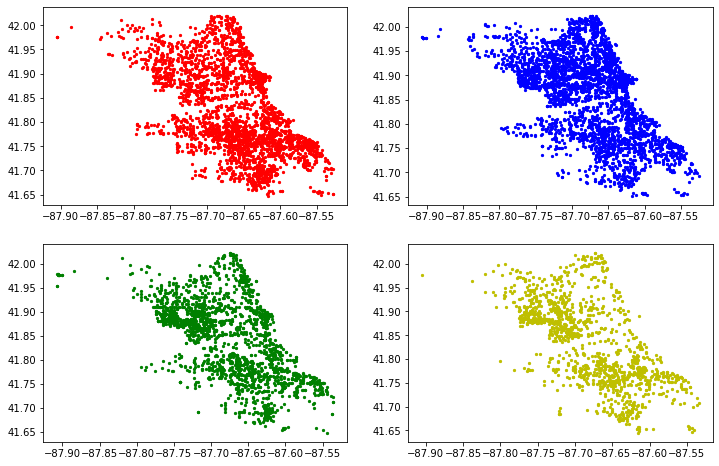

In [394]:
figure, axis = plt.subplots(2, 2, figsize=(12,8))
random_df = random_df.reset_index(drop=True)

clus_0 = []
clus_1 = []
clus_2 = []
clus_3 = []

for i in range(10000):
    clus_0.append(random_df["labels_k4"][i] == 0)
    clus_1.append(random_df["labels_k4"][i] == 1)
    clus_2.append(random_df["labels_k4"][i] == 2)
    clus_3.append(random_df["labels_k4"][i] == 3)

axis[0,0].scatter(np.array(random_df.loc[clus_0, "Longitude"]), np.array(random_df.loc[clus_0, "Latitude"]), s=5, c="r")
axis[0,1].scatter(np.array(random_df.loc[clus_1, "Longitude"]), np.array(random_df.loc[clus_1, "Latitude"]), s=5, c= "b")
axis[1,0].scatter(np.array(random_df.loc[clus_2, "Longitude"]), np.array(random_df.loc[clus_2, "Latitude"]), s=5, c= "g")
axis[1,1].scatter(np.array(random_df.loc[clus_3, "Longitude"]), np.array(random_df.loc[clus_3, "Latitude"]), s=5, c= "y")
plt.show()

In [312]:
#We can observe that Location does not play a deciding factor, as there is extensive overlap amongst clusters. 
#Also the map of Chicago is visible to an extent